In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
data = datasets.load_iris()

In [4]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
X = data['data']
y = data['target']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [8]:
pca = PCA(n_components=3)

In [9]:
X_train = pca.fit_transform(X_train)
X_train

array([[ 3.22902397e-01, -2.37270677e-01,  5.67385995e-02],
       [ 3.35552035e+00,  5.83049683e-01, -3.28026023e-01],
       [ 6.06909989e-01, -3.15971948e-01,  3.00676488e-01],
       [-2.72817511e+00,  4.27577132e-01,  1.15313718e-03],
       [ 3.45649511e+00,  5.05276379e-01, -5.58623842e-01],
       [ 1.81648425e-01, -2.53524117e-01, -2.95111131e-01],
       [-2.68432386e+00,  4.26081277e-01, -1.16106065e-01],
       [-2.81519461e+00,  3.65984714e-01,  1.04618538e-01],
       [-2.24998893e+00,  5.19074070e-01,  3.29384000e-01],
       [-5.78277826e-01, -1.17473663e+00, -3.43091299e-01],
       [ 1.33493144e+00, -1.58668543e-01, -7.85684488e-02],
       [-2.40366776e+00,  5.99469498e-02,  1.25799777e-01],
       [-2.55890034e+00, -2.63787007e-02, -2.52131368e-01],
       [-2.35087676e+00,  1.95931613e-01,  5.58985862e-02],
       [ 2.99984039e-01, -4.44823406e-01, -1.67008263e-02],
       [-2.63556736e+00,  3.39217011e-01, -5.69862980e-02],
       [ 2.80440519e-01, -1.55505144e-01

In [10]:
pca.components_

array([[ 0.36873621, -0.06977632,  0.85630117,  0.35484246],
       [ 0.68187006,  0.69682861, -0.1867726 , -0.12082672],
       [-0.53692993,  0.63566209,  0.05426774,  0.55199182]])

In [11]:
pca.explained_variance_ratio_

array([0.9201008 , 0.05494812, 0.01978256])

#### sklearn pca example

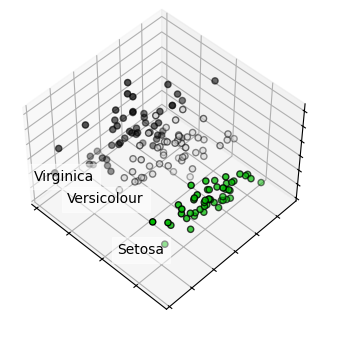

In [12]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()